## Housing Prices in Singapore

This exercise will attempt to predict resale housing prices in Singapore

In [2]:
# data 
import pandas as pd
import numpy as np

# directories
import os
#os.getcwd() #get working directory

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [3]:
# Set the relative director for training data
root_dir = "~"
train_data_dir = os.path.join(root_dir,"pythonprojects","Yidu","HW1 Data","train.csv")
test_data_dir = os.path.join(root_dir,"pythonprojects","Yidu","HW1 Data","test.csv")

# read the data frame
train_data = pd.read_csv(train_data_dir)
test_data = pd.read_csv(test_data_dir)

# Print out number of instances for each dataset
print("Training Data has {0} instances".format(len(train_data)))
print("Test Data has {0} instances".format(len(test_data)))

Training Data has 607992 instances
Test Data has 151999 instances


In [4]:
print(train_data.columns)
train_data.describe()

Index(['index', 'block', 'flat_model', 'flat_type', 'floor_area_sqm',
       'lease_commence_date', 'month', 'resale_price', 'storey_range',
       'street_name', 'town', 'latitude', 'longitude', 'postal_code', 'floor'],
      dtype='object')


,index,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,postal_code,floor
count,607992.000000,607992.000000,607992.000000,6.079920e+05,607992.000000,607992.000000,607992.000000,607992.000000
mean,303995.500000,95.542603,1986.547621,2.815431e+05,1.360492,103.838869,530443.042961,7.457277
std,175512.316769,26.191181,8.792567,1.414718e+05,0.041371,0.074209,180497.930226,4.504902
min,0.000000,28.000000,1966.000000,5.600000e+03,1.270380,103.685228,50004.000000,2.000000
25%,151997.750000,72.000000,1980.000000,1.750000e+05,1.333037,103.772579,460501.000000,5.000000
50%,303995.500000,93.000000,1985.000000,2.630000e+05,1.353276,103.842318,550140.000000,8.000000
75%,455993.250000,115.000000,1993.000000,3.688000e+05,1.379559,103.897606,650503.000000,11.000000
max,607991.000000,307.000000,2015.000000,1.180000e+06,1.457071,103.987805,825195.000000,50.000000


### Data Exploration

In [5]:
train_data.info()
# data contains index column, in addition to all the training set
# index will be useful if we have to remove outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 15 columns):
index                  607992 non-null int64
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
resale_price           607992 non-null float64
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 69.6+ MB


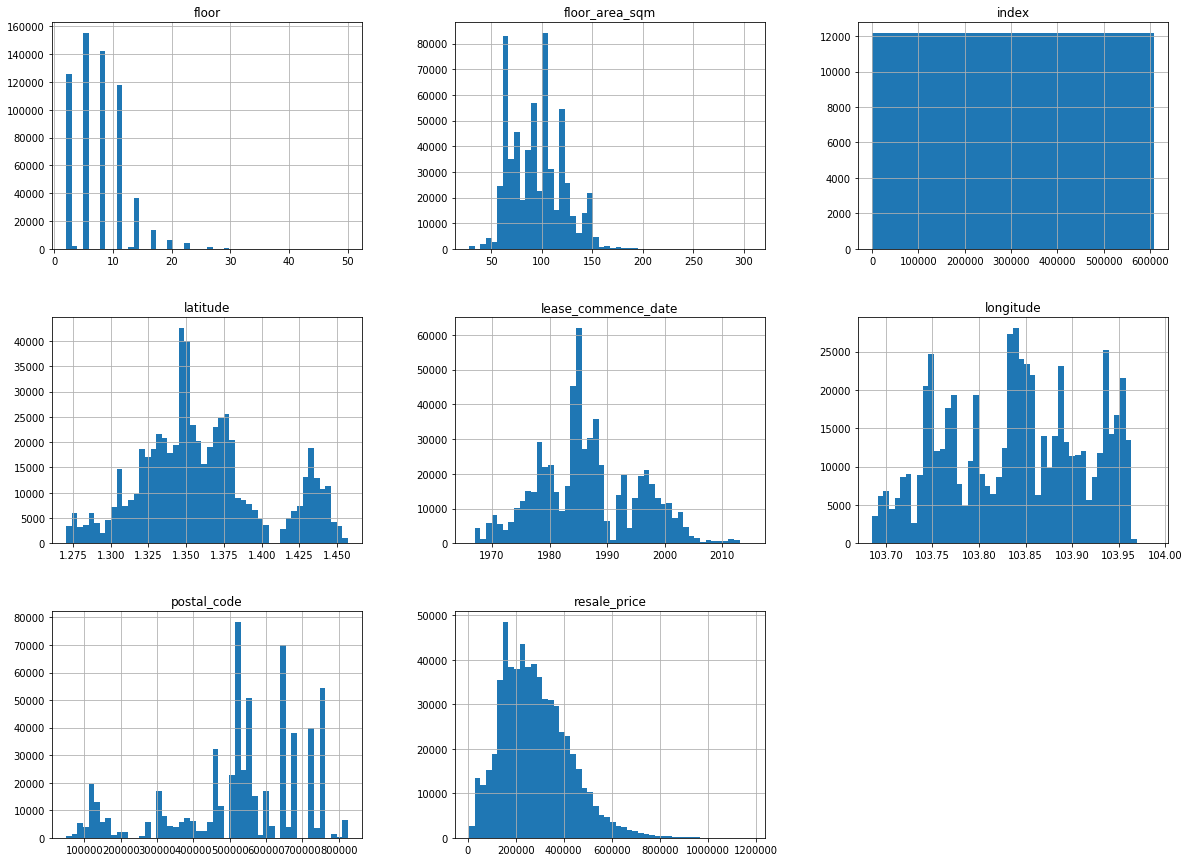

In [6]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

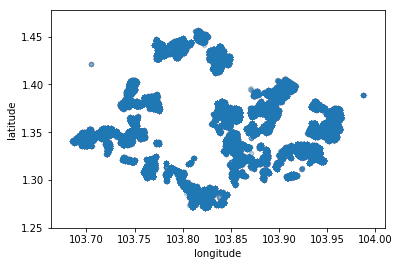

In [7]:
train_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.01)
plt.show()

In [9]:
# Splitting y_train
y_train_data = train_data.loc[:,'resale_price']

# transforming y_data via log function
y_train_log = np.log(y_train_data)
some_data = y_train_log.iloc[:5]
print(some_data)

0    12.650758
1    12.936034
2    13.208541
3     8.853665
4    12.535376
Name: resale_price, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111bace80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111c54e80>]], dtype=object)

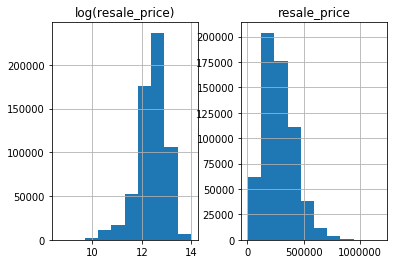

In [26]:
# removing the positive skew
prices = pd.DataFrame({"resale_price":y_train_data, "log(resale_price)":np.log(y_train_data)})
prices.hist()

In [27]:
# Getting x_train_data and x_test_data

x_train_data = train_data.loc[:, train_data.columns != 'resale_price']
x_train_data = x_train_data.loc[:, x_train_data.columns != 'index']
x_train_data.info()

x_test_data = test_data
x_test_data = x_test_data.loc[:, x_test_data.columns != 'index']
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 13 columns):
block                  607992 non-null object
flat_model             607992 non-null object
flat_type              607992 non-null object
floor_area_sqm         607992 non-null float64
lease_commence_date    607992 non-null int64
month                  607992 non-null object
storey_range           607992 non-null object
street_name            607992 non-null object
town                   607992 non-null object
latitude               607992 non-null float64
longitude              607992 non-null float64
postal_code            607992 non-null int64
floor                  607992 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 60.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151999 entries, 0 to 151998
Data columns (total 13 columns):
block                  151999 non-null object
flat_model             151999 non-null object
flat_type              15

### Data Preparation

In [28]:
x_train_data.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,storey_range,street_name,town,latitude,longitude,postal_code,floor
0,250,MODEL A,4 ROOM,105.0,1992,2001-11,04 TO 06,BISHAN ST 22,BISHAN,1.361615,103.843937,570250,5
1,166,IMPROVED,5 ROOM,121.0,1987,1996-07,10 TO 12,YISHUN RING RD,YISHUN,1.436284,103.831607,760166,11
2,306D,PREMIUM APARTMENT,4 ROOM,93.0,2012,2017-04,10 TO 12,PUNGGOL DR,PUNGGOL,1.406081,103.906438,824306,11
3,33,IMPROVED,1 ROOM,29.0,1969,1990-07,04 TO 06,TAMAN HO SWEE,BUKIT MERAH,1.288226,103.831906,161033,5
4,312,NEW GENERATION,4 ROOM,98.0,1985,2000-07,10 TO 12,SERANGOON AVE 2,SERANGOON,1.353288,103.865796,550312,11


In [10]:
# uniqueness of datasets
print("street_name: ", len(set(x_train_data['street_name'])))
print("town: ", len(set(x_train_data['town'])))
print("flat_model: ", len(set(x_train_data['flat_model'])))
print("storey_range:", len(set(x_train_data['storey_range'])))
print("floor:", len(set(x_train_data['floor'])))
print("flat model: ", len(set(x_train_data['flat_model'])))
print("postal code: ", len(set(x_train_data['postal_code'])))
print("block: ", len(set(x_train_data['block'])))

street_name:  542
town:  27
flat_model:  20
storey_range: 25
floor: 22
flat model:  20
postal code:  8742
block:  2178


In [29]:
# dropping variables
#street name, postal code and block have too many unique variables -> will overload the model

# street name - TOO MANY UNIQUE POINTS, PROBLEM WITH ENCODING
x_train_data = x_train_data.loc[:, x_train_data.columns != 'street_name']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'street_name']

# floor and storey range too similar, will drop STOREY RANGE 
x_train_data = x_train_data.loc[:, x_train_data.columns != 'storey_range']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'storey_range']

# dropping postal code - since we already have town
x_train_data = x_train_data.loc[:, x_train_data.columns != 'postal_code']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'postal_code']

# dropping block - too unique, probably not that important
x_train_data = x_train_data.loc[:, x_train_data.columns != 'block']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'block']

# dropping lat and long - already have town
x_train_data = x_train_data.loc[:, x_train_data.columns != 'latitude']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'latitude']

x_train_data = x_train_data.loc[:, x_train_data.columns != 'longitude']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'longitude']

In [30]:
# check before ecoding
train_data.where(train_data['resale_price']<50000).dropna()

,index,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
3,3.0,33,IMPROVED,1 ROOM,29.0,1969.0,1990-07,7000.0,04 TO 06,TAMAN HO SWEE,BUKIT MERAH,1.288226,103.831906,161033.0,5.0
9,9.0,702,NEW GENERATION,3 ROOM,67.0,1980.0,1991-01,47000.0,01 TO 03,WEST COAST RD,CLEMENTI,1.307267,103.761108,120702.0,2.0
117,117.0,122,NEW GENERATION,3 ROOM,67.0,1978.0,1991-07,46000.0,01 TO 03,ANG MO KIO AVE 3,ANG MO KIO,1.370189,103.843413,560122.0,2.0
306,306.0,40,STANDARD,3 ROOM,56.0,1971.0,1990-09,18000.0,04 TO 06,TANGLIN HALT RD,QUEENSTOWN,1.297986,103.798581,143040.0,5.0
347,347.0,518,NEW GENERATION,3 ROOM,68.0,1980.0,1991-08,47000.0,07 TO 09,WEST COAST RD,CLEMENTI,1.308218,103.758943,120518.0,8.0
450,450.0,210,NEW GENERATION,3 ROOM,67.0,1985.0,1991-11,34500.0,07 TO 09,YISHUN ST 21,YISHUN,1.431326,103.838868,760210.0,8.0
493,493.0,540,NEW GENERATION,3 ROOM,68.0,1981.0,1992-07,47000.0,10 TO 12,ANG MO KIO AVE 10,ANG MO KIO,1.375294,103.855452,560540.0,11.0
554,554.0,245,NEW GENERATION,3 ROOM,67.0,1982.0,1992-05,42000.0,01 TO 03,JURONG EAST ST 24,JURONG EAST,1.341681,103.741783,600245.0,2.0
574,574.0,195,IMPROVED,3 ROOM,66.0,1973.0,1991-12,37000.0,10 TO 12,KIM KEAT AVE,TOA PAYOH,1.330293,103.859166,310195.0,11.0
669,669.0,631,NEW GENERATION,3 ROOM,67.0,1985.0,1990-03,40000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,1.379557,103.840736,560631.0,8.0


In [31]:
from datetime import datetime

def year_month_transform(year_month):
    year_month = datetime.strptime(year_month, "%Y-%m")
    year_month = (year_month-datetime(1970,1,1)).total_seconds()/60/60/24
    return year_month

def year_transform(year):
    year = datetime.strptime(str(year), "%Y")
    year = (year-datetime(1970,1,1)).total_seconds()/60/60/24
    return year

In [32]:
# TRAIN SET - calculating age when sold in days and removing month column
x_train_data['month_in_days']=x_train_data['month'].apply(year_month_transform)
x_train_data['lease_commence_date_in_days']=x_train_data['lease_commence_date'].apply(year_transform)
x_train_data['lease_age_when_sold_in_days']=x_train_data['month_in_days']-x_train_data['lease_commence_date_in_days']
x_train_data = x_train_data.loc[:, x_train_data.columns != 'month_in_days']
x_train_data = x_train_data.loc[:, x_train_data.columns != 'lease_commence_date_in_days']

In [33]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151999 entries, 0 to 151998
Data columns (total 7 columns):
flat_model             151999 non-null object
flat_type              151999 non-null object
floor_area_sqm         151999 non-null float64
lease_commence_date    151999 non-null int64
month                  151999 non-null object
town                   151999 non-null object
floor                  151999 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.1+ MB


In [34]:
# TEST SET - calculating age when sold in days and removing month column
x_test_data['month_in_days']=x_test_data['month'].apply(year_month_transform)
x_test_data['lease_commence_date_in_days']=x_test_data['lease_commence_date'].apply(year_transform)
x_test_data['lease_age_when_sold_in_days']=x_test_data['month_in_days']-x_test_data['lease_commence_date_in_days']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'month_in_days']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'lease_commence_date_in_days']


In [35]:
x_train_data = x_train_data.loc[:, x_train_data.columns != 'month']
x_test_data = x_test_data.loc[:, x_test_data.columns != 'month']

In [36]:
x_test_data.head()

,flat_model,flat_type,floor_area_sqm,lease_commence_date,town,floor,lease_age_when_sold_in_days
0,NEW GENERATION,4 ROOM,92.0,1981,CLEMENTI,11,12143.0
1,NEW GENERATION,4 ROOM,91.0,1980,CLEMENTI,5,7702.0
2,MODEL A,4 ROOM,105.0,1984,BEDOK,8,4780.0
3,NEW GENERATION,3 ROOM,81.0,1978,CLEMENTI,5,7729.0
4,IMPROVED,3 ROOM,59.0,1974,QUEENSTOWN,5,11382.0


In [19]:
x_train_data.head()

,flat_model,flat_type,floor_area_sqm,lease_commence_date,town,floor,lease_age_when_sold_in_days
0,MODEL A,4 ROOM,105.0,1992,BISHAN,5,3592.0
1,IMPROVED,5 ROOM,121.0,1987,YISHUN,11,3469.0
2,PREMIUM APARTMENT,4 ROOM,93.0,2012,PUNGGOL,11,1917.0
3,IMPROVED,1 ROOM,29.0,1969,BUKIT MERAH,5,7851.0
4,NEW GENERATION,4 ROOM,98.0,1985,SERANGOON,11,5660.0


One Hot Encoding

In [40]:
set(x_train_data['flat_type'])

{'1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI GENERATION'}

In [41]:
 def map_flat_type_bedroom(flat_type):
    if flat_type == '1 ROOM':
        no_bedroom = 0
    elif flat_type == '2 ROOM':
        no_bedroom = 1
    elif flat_type == '3 ROOM':
        no_bedroom = 2
    elif flat_type == '4 ROOM':
        no_bedroom = 3
    elif flat_type == '5 ROOM':
        no_bedroom = 3
    elif flat_type == 'EXECUTIVE':
        no_bedroom = 3
    elif flat_type == 'MULTI GENERATION':
        no_bedroom = 4
    return (no_bedroom)

 def map_flat_type_bath(flat_type):
    if flat_type == '1 ROOM':
        no_bath = 1
    elif flat_type == '2 ROOM':
        no_bath = 1
    elif flat_type == '3 ROOM':
        no_bath = 2
    elif flat_type == '4 ROOM':
        no_bath = 2
    elif flat_type == '5 ROOM':
        no_bath = 2
    elif flat_type == 'EXECUTIVE':
        no_bath = 2
    elif flat_type == 'MULTI GENERATION':
        no_bath = 3
    return (no_bath)

In [42]:
x_train_data['no_bath']=x_train_data['flat_type'].apply(map_flat_type_bath)
x_train_data['no_bedroom']=x_train_data['flat_type'].apply(map_flat_type_bedroom)

In [43]:
x_test_data['no_bath']=x_test_data['flat_type'].apply(map_flat_type_bath)
x_test_data['no_bedroom']=x_test_data['flat_type'].apply(map_flat_type_bedroom)

In [44]:
x_train_data.head()

,flat_model,flat_type,floor_area_sqm,lease_commence_date,town,floor,lease_age_when_sold_in_days,no_bath,no_bedroom
0,MODEL A,4 ROOM,105.0,1992,BISHAN,5,3592.0,2,3
1,IMPROVED,5 ROOM,121.0,1987,YISHUN,11,3469.0,2,3
2,PREMIUM APARTMENT,4 ROOM,93.0,2012,PUNGGOL,11,1917.0,2,3
3,IMPROVED,1 ROOM,29.0,1969,BUKIT MERAH,5,7851.0,1,0
4,NEW GENERATION,4 ROOM,98.0,1985,SERANGOON,11,5660.0,2,3


In [25]:
#filling NA's with the median of the column:
x_train_data = x_train_data.fillna(x_train_data.median())
x_test_data = x_test_data.fillna(x_test_data.median())

# actually ther are no NAs

In [45]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607992 entries, 0 to 607991
Data columns (total 9 columns):
flat_model                     607992 non-null object
flat_type                      607992 non-null object
floor_area_sqm                 607992 non-null float64
lease_commence_date            607992 non-null int64
town                           607992 non-null object
floor                          607992 non-null int64
lease_age_when_sold_in_days    607992 non-null float64
no_bath                        607992 non-null int64
no_bedroom                     607992 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 41.7+ MB


In [46]:
# Encoding categorical variables
x_train_encoded = pd.get_dummies(x_train_data)
x_test_encoded = pd.get_dummies(x_test_data)

# Visualize
x_train_encoded.columns

Index(['floor_area_sqm', 'lease_commence_date', 'floor',
       'lease_age_when_sold_in_days', 'no_bath', 'no_bedroom',
       'flat_model_2-ROOM', 'flat_model_ADJOINED FLAT', 'flat_model_APARTMENT',
       'flat_model_DBSS', 'flat_model_IMPROVED',
       'flat_model_IMPROVED-MAISONETTE', 'flat_model_MAISONETTE',
       'flat_model_MODEL A', 'flat_model_MODEL A-MAISONETTE',
       'flat_model_MODEL A2', 'flat_model_MULTI GENERATION',
       'flat_model_NEW GENERATION', 'flat_model_PREMIUM APARTMENT',
       'flat_model_PREMIUM APARTMENT LOFT', 'flat_model_PREMIUM MAISONETTE',
       'flat_model_SIMPLIFIED', 'flat_model_STANDARD', 'flat_model_TERRACE',
       'flat_model_TYPE S1', 'flat_model_TYPE S2', 'flat_type_1 ROOM',
       'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM',
       'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI GENERATION',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG'

In [47]:
# standard scalers?
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train_encoded)

In [48]:
x_train_scaled

array([[ 0.36109121,  0.62011287, -0.54546788, ..., -0.18885971,
        -0.2763481 , -0.2888469 ],
       [ 0.97198438,  0.05145024,  0.78641565, ..., -0.18885971,
        -0.2763481 ,  3.46204168],
       [-0.09707866,  2.89476341,  0.78641565, ..., -0.18885971,
        -0.2763481 , -0.2888469 ],
       ..., 
       [ 1.12470767, -0.9721425 ,  3.45018272, ..., -0.18885971,
        -0.2763481 , -0.2888469 ],
       [ 0.66653779,  0.27891529,  0.78641565, ..., -0.18885971,
        -0.2763481 , -0.2888469 ],
       [-1.0134184 , -0.06228228,  0.12047388, ..., -0.18885971,
        -0.2763481 , -0.2888469 ]])

### Model Selection

#### Linear Regression

In [50]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

lin_model = sklearn.linear_model.LinearRegression()
lin_scores = cross_val_score(lin_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
model1_mae_scores = (-lin_scores)
print(model1_mae_scores)

[ 48676.75444331  48698.49311498  48835.63121027]


In [31]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

lin_model = sklearn.linear_model.LinearRegression()
lin_scores = cross_val_score(lin_model, x_train_scaled, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
model1_mae_scores = (-lin_scores)
print(model1_mae_scores)

[ 48680.02080313  48698.11178507  48833.94904559]


In [32]:
some_data = x_train_encoded.iloc[:5]
#print(some_data)
print(y_train_data.iloc[:5])

0    312000.0
1    415000.0
2    545000.0
3      7000.0
4    278000.0
Name: resale_price, dtype: float64


In [33]:
lin_model.fit(x_train_encoded, y_train_data)
y_predict = lin_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

[ 362083.8295949   282474.75672298  450124.31413173  -38877.03359976
  271950.13268436]
[312000.0, 415000.0, 545000.0, 7000.0, 278000.0]


In [41]:
lin_model.fit(x_train_encoded, y_train_data)
y_predict = lin_model.predict(x_test_encoded)
np.savetxt("lin_model_sol.csv", y_predict, delimiter=",")

#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
        ('poly_features', PolynomialFeatures(3)),
        ('lin_model', LinearRegression()),
    ])

poly_scores = cross_val_score(poly_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
poly_mae_scores = -poly_scores
print(poly_mae_scores)



#### SGD Regressor

In [36]:
import sklearn.linear_model
from sklearn.model_selection import cross_val_score

sgdr_model = sklearn.linear_model.SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None,
       verbose=0, warm_start=False)
sgdr_scores = cross_val_score(sgdr_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
sgdr_mae_scores = -sgdr_scores
print(sgdr_mae_scores)

[  1.42721989e+15   6.20899662e+14   2.98393302e+14]


In [37]:
sgdr_model.fit(x_train_encoded, y_train_data)
y_predict = sgdr_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

[  2.13262015e+14   2.12237217e+14   1.50991931e+14   3.41828329e+14
   2.82123826e+14]
[312000.0, 415000.0, 545000.0, 7000.0, 278000.0]


#### Lasso Regression

In [43]:
lasso_model = sklearn.linear_model.Lasso()
lasso_scores = cross_val_score(lasso_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
lasso_mae_scores = -lasso_scores
print(lasso_mae_scores)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[ 48677.71390888  48698.87507267  48835.77664533]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [44]:
lasso_model.fit(x_train_encoded, y_train_data)
y_predict = lasso_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

[ 362045.7716414   282497.69377349  450355.50358401  -39510.67689467
  271953.46522384]
[312000.0, 415000.0, 545000.0, 7000.0, 278000.0]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### Elastic Net

In [47]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet_scores = cross_val_score(enet_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
enet_mae_scores = -enet_scores
print(enet_mae_scores)

[ 49055.34663216  49063.28251159  49215.84667818]


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'alpha':np.arange(0.0001,0.01,0.0002)}
]

grid_search = GridSearchCV(enet_model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train_encoded, y_train_data)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.0001,  0.0003,  0.0005,  0.0007,  0.0009,  0.0011,  0.0013,
        0.0015,  0.0017,  0.0019,  0.0021,  0.0023,  0.0025,  0.0027,
        0.0029,  0.0031,  0.0033,  0.0035,  0.0037,  0.0039,  0.0041,
        0.0043,  0.0045,  0.0047,  0.0049,  0.0051,  0.0053,  0.0055...1,  0.0083,
        0.0085,  0.0087,  0.0089,  0.0091,  0.0093,  0.0095,  0.0097,
        0.0099])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
## Find the best parameters
grid_search.best_params_

{'alpha': 0.0001}

In [51]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=0.001, l1_ratio=0.5)
enet_scores = cross_val_score(enet_model, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
enet_mae_scores = -enet_scores
print(enet_mae_scores)

[ 49055.34663216  49063.28251159  49215.84667818]


#### Linear SVR

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg_scores = cross_val_score(svm_reg, x_train_encoded, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
svm_reg_mae_scores = -lasso_scores
print(svm_reg_mae_scores)

In [ ]:
svm_reg.fit(x_train_encoded, y_train_data)
y_predict = svm_reg_model.predict(some_data)
print(y_predict)
print(list(y_train_data.iloc[:5]))

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg_scores = cross_val_score(svm_reg, x_train_scaled, y_train_data,
                         scoring="neg_mean_absolute_error", cv=3)
svm_reg_mae_scores = -lasso_scores
print(svm_reg_mae_scores)